<a href="https://colab.research.google.com/github/UmarBalak/TensorFlow-For-Deep-Learning/blob/main/01_01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Regression with Neural Network in TensorFlow**

In [1]:
# import TensorFlow
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
print(tf.__version__)

2.15.0


### **Creating some data to view and fit**


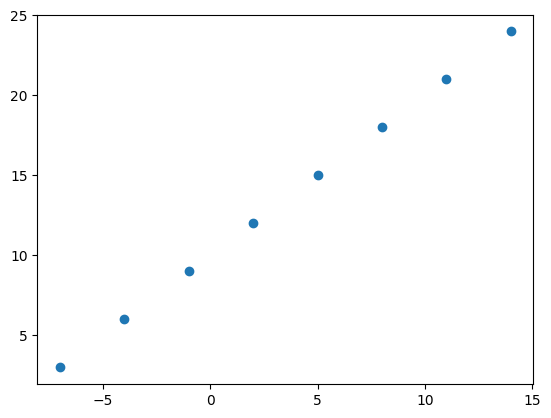

In [ ]:


# Create Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
# Relationship
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### **Input and Output shapes**

In [ ]:
# Create a demo tensor for our housing price prewdiction problem

house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# Turn out our Numpy arrays into tensors

X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Input shape and Output shape

input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

### **Steps in modeling with TensorFlow**

1. **Creating the model** - define the input layer and the output layer as well as the hidden layers of a deep learning model.
2. **Compiling the model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = keras.Sequential([
    keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = keras.losses.mae, # mae is a short form of mean absolute erre
              optimizer = keras.optimizers.SGD(), # SGD is a short form of Stochastic Gradient Descent
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 976ms/step - loss: 13.8661 - mae: 13.8661
Epoch 2/5
1/1 [==============================] - 0s 26ms/step - loss: 13.7336 - mae: 13.7336
Epoch 3/5
1/1 [==============================] - 0s 28ms/step - loss: 13.6011 - mae: 13.6011
Epoch 4/5
1/1 [==============================] - 0s 37ms/step - loss: 13.4686 - mae: 13.4686
Epoch 5/5
1/1 [==============================] - 0s 43ms/step - loss: 13.3361 - mae: 13.3361


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([19.0])
y_pred

1/1 [==============================] - 0s 135ms/step


array([[1.3878001]], dtype=float32)

### **Improving our model**

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perheps the **learning rate** of the optimization function.
3. **Fitting the model** - here we might fit a model for more **epochs** (leave it for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model
### Increase the epoch value ###

# 1. Create the model
model = keras.Sequential([
    keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = keras.losses.mae,
              optimizer = keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 575ms/step - loss: 8.0703 - mae: 8.0703
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 7.9378 - mae: 7.9378
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 7.8053 - mae: 7.8053
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 7.6728 - mae: 7.6728
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 7.5403 - mae: 7.5403
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 7.4625 - mae: 7.4625
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 7.4569 - mae: 7.4569
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4513 - mae: 7.4513
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 7.4456 - mae: 7.4456
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 7.4400 - mae: 7.4400
Epoch 11/100
1/1 [==============================] - 0s 27ms/step - l

In [ ]:
model.predict([27.0])

1/1 [==============================] - 0s 65ms/step


array([[47.373497]], dtype=float32)

In [ ]:
# Let's rebuild our model
# Add 1 more hidden layer

# 1. Create the model
model = keras.Sequential([
    keras.layers.Dense(85, activation = None),
    keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = keras.losses.mae,
              optimizer = keras.optimizers.Adam(lr = 0.01),
              metrics = ['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 80)

Epoch 1/80
1/1 [==============================] - 1s 613ms/step - loss: 13.4223 - mae: 13.4223
Epoch 2/80
1/1 [==============================] - 0s 13ms/step - loss: 13.3259 - mae: 13.3259
Epoch 3/80
1/1 [==============================] - 0s 11ms/step - loss: 13.2295 - mae: 13.2295
Epoch 4/80
1/1 [==============================] - 0s 19ms/step - loss: 13.1332 - mae: 13.1332
Epoch 5/80
1/1 [==============================] - 0s 10ms/step - loss: 13.0368 - mae: 13.0368
Epoch 6/80
1/1 [==============================] - 0s 12ms/step - loss: 12.9403 - mae: 12.9403
Epoch 7/80
1/1 [==============================] - 0s 12ms/step - loss: 12.8439 - mae: 12.8439
Epoch 8/80
1/1 [==============================] - 0s 18ms/step - loss: 12.7473 - mae: 12.7473
Epoch 9/80
1/1 [==============================] - 0s 15ms/step - loss: 12.6508 - mae: 12.6508
Epoch 10/80
1/1 [==============================] - 0s 12ms/step - loss: 12.5542 - mae: 12.5542
Epoch 11/80
1/1 [==============================] - 0s 14ms

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 116ms/step


array([[32.14094]], dtype=float32)

In [ ]:
# Let's rebuild our model
# Add 3 more hidden layers
# 1. Create the model
model = keras.Sequential([
    keras.layers.Dense(50, activation = None),
    keras.layers.Dense(50, activation = None),
    keras.layers.Dense(50, activation = None),
    keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = keras.losses.mae,
              optimizer = keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 588ms/step - loss: 13.7018 - mae: 13.7018
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4758 - mae: 12.4758
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.2308 - mae: 11.2308
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.8623 - mae: 9.8623
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2478 - mae: 8.2478
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4000 - mae: 7.4000
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8817 - mae: 7.8817
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 7.5408 - mae: 7.5408
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4960 - mae: 7.4960
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 7.6994 - mae: 7.6994
Epoch 11/100
1/1 [==============================] - 0s 11ms/st

In [ ]:
model.predict([30.0])

1/1 [==============================] - 0s 75ms/step


array([[42.964993]], dtype=float32)

### **New Model on new dataset**

In [ ]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = (2 * X) - 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-210, -202, -194, -186, -178, -170, -162, -154, -146, -138, -130,
       -122, -114, -106,  -98,  -90,  -82,  -74,  -66,  -58,  -50,  -42,
        -34,  -26,  -18,  -10,   -2,    6,   14,   22,   30,   38,   46,
         54,   62,   70,   78,   86,   94,  102,  110,  118,  126,  134,
        142,  150,  158,  166,  174,  182], dtype=int32)>

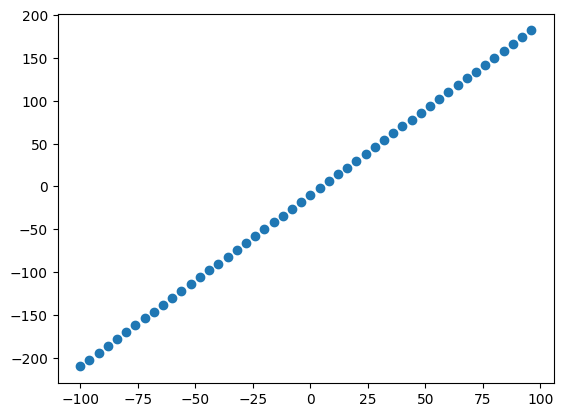

In [ ]:
plt.scatter(X, y)

In [ ]:
len(X)

50

In [ ]:
X_train = X[:40] # 80%
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

In [ ]:
model_1 = keras.Sequential([
    keras.layers.Dense(units = 1, input_shape = [1], activation = 'relu')
])

model_1.compile(
    loss = keras.losses.mae,
    optimizer = keras.optimizers.SGD(),
    metrics = ['mae']
)

model_1.fit(X_train, y_train, epochs = 50)

In [ ]:
# New model (increase epochs)
model_2 = keras.Sequential([
    keras.layers.Dense(units = 1, input_shape = [1], activation = 'relu')
])

model_2.compile(
    loss = keras.losses.mae,
    optimizer = keras.optimizers.SGD(),
    metrics = ['mae']
)

model_2.fit(X_train, y_train, epochs = 500)

In [ ]:
# New model (add extra hidden layer)

model_3 = keras.Sequential([
    keras.layers.Dense(units = 64, input_shape = [1], activation = 'relu'),
    keras.layers.Dense(units = 1)
])

model_3.compile(
    loss = keras.losses.mae,
    optimizer = keras.optimizers.SGD(),
    metrics = ['mae']
)

model_3.fit(X_train, y_train, epochs = 500)

In [ ]:
# New model (change the optimizer)

model_4 = keras.Sequential([
    keras.layers.Dense(units = 64, input_shape = [1], activation = 'relu', name = 'input_layer'),
    keras.layers.Dense(units = 1, name = 'output_layer')
], name = 'model_NO_4')

model_4.compile(
    loss = keras.losses.mae,
    optimizer = keras.optimizers.Adam(),
    metrics = ['mae']
)

model_4.fit(X_train, y_train, epochs = 500)

In [ ]:
model_4.summary()

Model: "model_NO_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 64)                128       
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


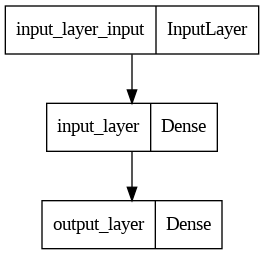

In [ ]:
plot_model(model = model_4)

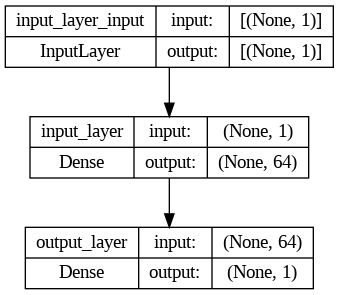

In [ ]:
plot_model(model = model_4, show_shapes = True)

In [ ]:
#Let's make predictions on our test data
y_preds = model_4.predict(X_test).flatten()
y_preds

1/1 [==============================] - 0s 117ms/step


array([106.944664, 114.37005 , 121.79543 , 129.22081 , 136.64622 ,
       144.0716  , 151.4968  , 158.92137 , 166.34593 , 173.77048 ],
      dtype=float32)

In [ ]:
# Let's make a DataFrame to compare our prediction with the ground truth

df_predictions = pd.DataFrame({'Ground_Truth': y_test, 'Model_prediction': y_preds}, columns=['Ground_Truth', 'Model_prediction'])
df_predictions['Model_prediction'] = df_predictions['Model_prediction'].astype(int)

In [ ]:
df_predictions

,Ground_Truth,Model_prediction
0,110,106
1,118,114
2,126,121
3,134,129
4,142,136
5,150,144
6,158,151
7,166,158
8,174,166
9,182,173


In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_preds
                     ):
  plt.figure(figsize = (10, 7))
  plt.scatter(train_data, train_labels, c = 'b', label = 'Training data')
  plt.scatter(test_data, test_labels, c='g', label = 'Test data')
  plt.scatter(test_data, predictions, c = 'r', label = 'Predictions')
  plt.legend()

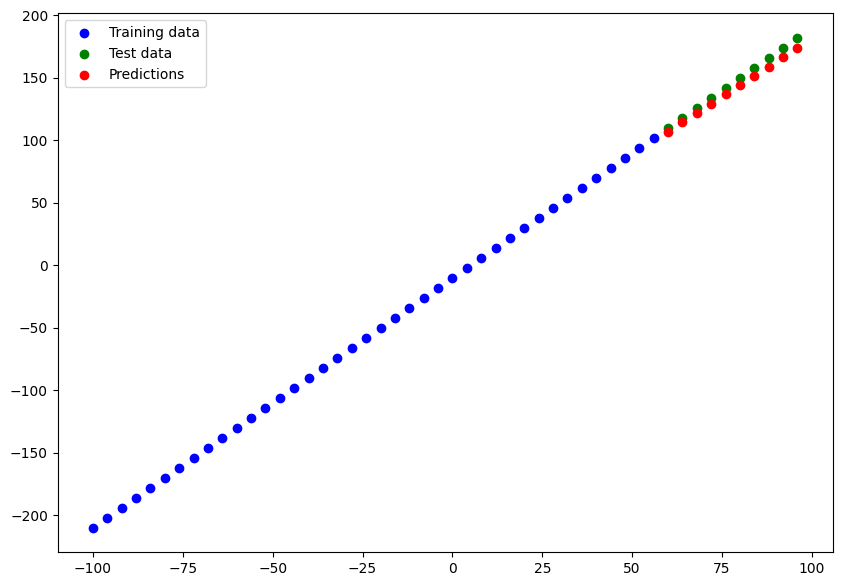

In [ ]:
plot_predictions()

In [ ]:
model_4.evaluate(X_test, y_test)

1/1 [==============================] - 1s 538ms/step - loss: 5.6417 - mae: 5.6417


[5.641664981842041, 5.641664981842041]

In [ ]:
mae = keras.losses.MAE(y_test, y_preds)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=5.641665>

In [ ]:
mse = keras.losses.MSE(y_test, y_preds)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=34.554802>

### **Large Example**

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance, drop_first = True)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
# Splitting into X and y
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
# Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
tf.random.set_seed(42)

insurance_model = keras.Sequential([
    keras.layers.Dense(units = 100, input_shape = [len(X.columns)], activation = 'linear'),
    keras.layers.Dense(units = 100, activation = 'linear'),
    keras.layers.Dense(units = 1, activation = 'linear'),
])

insurance_model.compile(
    loss = keras.losses.mae,
    optimizer = keras.optimizers.Adam(),
    metrics = ['mae']
)

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 3s 9ms/step - loss: 13031.1416 - mae: 13031.1416
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12248.8584 - mae: 12248.8584
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 10163.5908 - mae: 10163.5908
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7798.8203 - mae: 7798.8203
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7356.6899 - mae: 7356.6899
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7312.7427 - mae: 7312.7427
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7261.6685 - mae: 7261.6685
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7228.2285 - mae: 7228.2285
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7181.4541 - mae: 7181.4541
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7132.3975 - mae: 713

In [ ]:
# Normalize the data (0 to 1) for better accuracy

# Create a scaler object
scaler = MinMaxScaler()
# Fit and transform the data
X_norm = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

X_norm.describe()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395572,0.218984,0.505232,0.204783,0.242900,0.272048,0.242900
std,0.305434,0.164062,0.241099,0.500160,0.403694,0.428995,0.445181,0.428995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.278080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.388485,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.504002,0.400000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Create training and test sets with the normalized data (X_norm)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 10)

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = keras.Sequential([
    keras.layers.Dense(units = 100, input_shape = [len(X.columns)], activation = 'relu'),
    keras.layers.Dense(units = 50, activation = 'relu'),
    keras.layers.Dense(units = 25, activation = 'relu'),
    keras.layers.Dense(units = 1, activation = 'relu'),
])

insurance_model_2.compile(
    loss = keras.losses.mae,
    optimizer = keras.optimizers.Adam(),
    metrics = ['mae']
)

history_2 = insurance_model_2.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13198.9980 - mae: 13198.9980
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13190.9160 - mae: 13190.9160
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 13141.2041 - mae: 13141.2041
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 12945.7539 - mae: 12945.7539
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 12402.0635 - mae: 12402.0635
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 11257.7314 - mae: 11257.7314
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 9600.8340 - mae: 9600.8340
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 8163.8784 - mae: 8163.8784
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7512.8589 - mae: 7512.8589
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7316.2417 - ma

Text(0.5, 0, 'Epochs')

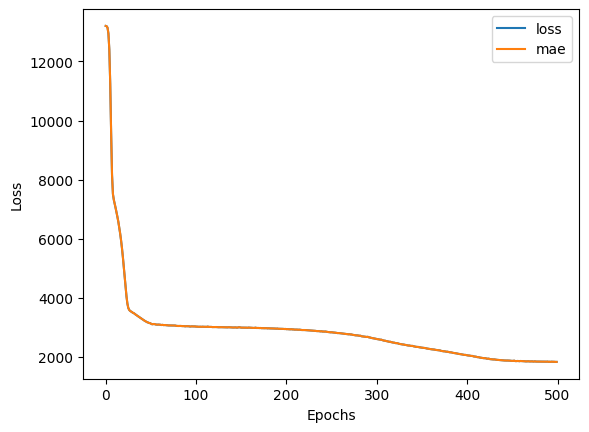

In [ ]:
pd.DataFrame(history_2.history).plot()
plt.ylabel('Loss')
plt.xlabel("Epochs")